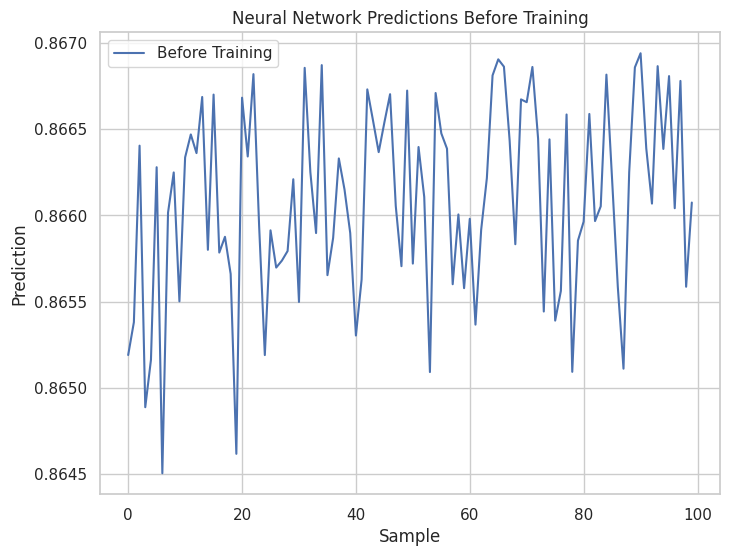

Epoch 1/100, Loss: 0.1817
Epoch 2/100, Loss: 0.1808
Epoch 3/100, Loss: 0.1799
Epoch 4/100, Loss: 0.1791
Epoch 5/100, Loss: 0.1782
Epoch 6/100, Loss: 0.1773
Epoch 7/100, Loss: 0.1764
Epoch 8/100, Loss: 0.1755
Epoch 9/100, Loss: 0.1746
Epoch 10/100, Loss: 0.1737
Epoch 11/100, Loss: 0.1727
Epoch 12/100, Loss: 0.1718
Epoch 13/100, Loss: 0.1708
Epoch 14/100, Loss: 0.1699
Epoch 15/100, Loss: 0.1689
Epoch 16/100, Loss: 0.1679
Epoch 17/100, Loss: 0.1670
Epoch 18/100, Loss: 0.1660
Epoch 19/100, Loss: 0.1650
Epoch 20/100, Loss: 0.1640
Epoch 21/100, Loss: 0.1630
Epoch 22/100, Loss: 0.1620
Epoch 23/100, Loss: 0.1609
Epoch 24/100, Loss: 0.1599
Epoch 25/100, Loss: 0.1589
Epoch 26/100, Loss: 0.1578
Epoch 27/100, Loss: 0.1568
Epoch 28/100, Loss: 0.1557
Epoch 29/100, Loss: 0.1546
Epoch 30/100, Loss: 0.1536
Epoch 31/100, Loss: 0.1525
Epoch 32/100, Loss: 0.1514
Epoch 33/100, Loss: 0.1503
Epoch 34/100, Loss: 0.1492
Epoch 35/100, Loss: 0.1481
Epoch 36/100, Loss: 0.1470
Epoch 37/100, Loss: 0.1459
Epoch 38/1

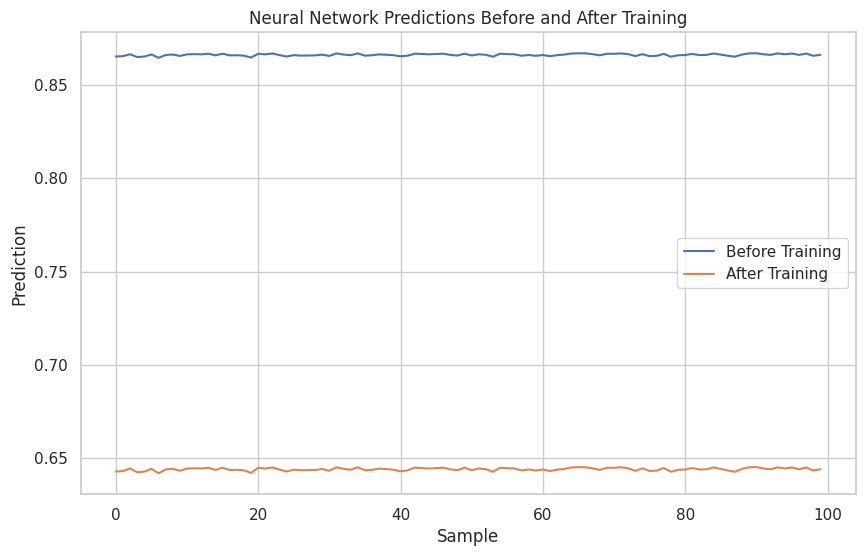

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt

# weights and biases
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 3)  # First layer: 2 inputs, 3 neurons
        self.fc2 = nn.Linear(3, 3)  # Second layer: 3 neurons
        self.fc3 = nn.Linear(3, 3)  # Third layer: 3 neurons
        self.out = nn.Linear(3, 1)  # Output layer: 1 neuron

        self.fc1.weight = nn.Parameter(torch.rand(3, 2))  # Random weights for layer 1
        self.fc1.bias = nn.Parameter(torch.rand(3))       # Random biases for layer 1
        self.fc2.weight = nn.Parameter(torch.rand(3, 3))  # Random weights for layer 2
        self.fc2.bias = nn.Parameter(torch.rand(3))       # Random biases for layer 2
        self.fc3.weight = nn.Parameter(torch.rand(3, 3))  # Random weights for layer 3
        self.fc3.bias = nn.Parameter(torch.rand(3))       # Random biases for layer 3
        self.out.weight = nn.Parameter(torch.rand(1, 3))  # Random weights for output layer
        self.out.bias = nn.Parameter(torch.rand(1))       # Random biases for output layer

    def forward(self, x):
        # Forward Sigmoid activations
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        # Tanh for the output layer
        x = torch.tanh(self.out(x))
        return x

inputs = torch.rand((100, 2))
net = SimpleNN()

predictions_before_training = net(inputs).detach().numpy()


sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(100), y=predictions_before_training.flatten(), label="Before Training")
plt.title("Neural Network Predictions Before Training")
plt.xlabel("Sample")
plt.ylabel("Prediction")
plt.show()

criterion = nn.MSELoss()  # the error between prediction and true
optimizer = optim.SGD(net.parameters(), lr=0.01)  # SGD optimizer with a learning rate of 0.01

# true outputs (the target values the network will try to learn)
true_outputs = torch.rand((100, 1))

# Training
epochs = 100
for epoch in range(epochs):
    # Forward pass: Get predictions
    outputs = net(inputs)

    # Calculate loss
    loss = criterion(outputs, true_outputs)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

predictions_after_training = net(inputs).detach().numpy()


plt.figure(figsize=(10, 6))
sns.lineplot(x=range(100), y=predictions_before_training.flatten(), label="Before Training")
sns.lineplot(x=range(100), y=predictions_after_training.flatten(), label="After Training")
plt.title("Neural Network Predictions Before and After Training")
plt.xlabel("Sample")
plt.ylabel("Prediction")
plt.legend()
plt.show()
